# Locally Weighted Regression


```python

- finding the line such that parameters got more affected more by points in locality than those far away.
```
**Why u ask?**
![](images/diagram.png)

**because as from above diagram point generally follows the trend as of its neighbourhood.**
```Python

- to do that we modify error function such that local points error are multiply by some weight to make them more significant.
- for doing that we define weights in terms of distance:

```
![](images/LWLR.png)

In [133]:
# here tau is bandwidth parameter 

# Visualizing weight function

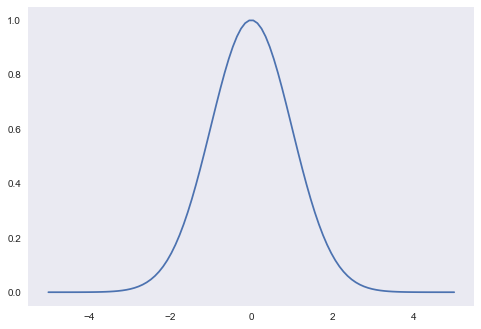

In [134]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)
xi = 0.0
tau = 1 

y = np.exp(-1 * (xi-x)**2 / 2*tau*tau)
plt.plot(x,y)
plt.grid()


```python
- for points in locality (xi-x) term is very small close to zero , w -> e^(0) = 1,
- if xi-x is large then (xi-x) tends to infintiy , w -> e^(-inf) = 0 , so w lies in (0,1), hence adding some weightage to closer points.

- Now our error function becomes:-
```
![](images/loss_lwlr.PNG)



# About Algo

```python
`NO` training time (Lazy learners) is required because we are not training here, everytime we got a query(x_test) , we will learn parameter then and there ,in the way we decrease our modified error function.

so training time is O(1)
and predicting time per query is O(n^3) as matrix multiplication is o(n^3) operation .

- Locally weighted linear regression is the first example we’re seeing of a `non-parametric algorithm`. The (unweighted) linear regression algorithm that we saw earlier is known as a parametric learning algorithm, because it has a fixed, finite number of parameters (the θi ’s), which are fit to the data. Once we’ve fit the θi ’s and stored them away, we no longer need to keep the training data around to make future predictions. In contrast, to make predictions using locally weighted linear regression, we need to keep the entire training set around. The term “non-parametric” (roughly) refers to the fact that the amount of stuff we need to keep in order to represent the hypothesis h grows linearly with the size of the training set.
```

```python
# Minimizing the loss function , again that is a convex function (only scaling changes as a scalar is getting multiplied only), 
# so we can use gradient descent ,or closed form solution.


# Lets do it with closed form solution - when we derive the result similarly by taking derivative and equating to zero ,we got 

# we can say it in other words X and Y both are multiplied by sqrt of w 


```
![](images/LWLR_formula2.png)


In [135]:
import numpy as np
import matplotlib.pyplot as plt


In [136]:
X = np.loadtxt('Datasets/weightedX.txt')
Y = np.loadtxt('Datasets/weightedY.txt')
# Normalizing the data
X = (X - X.mean())/X.std()
plt.style.use('seaborn')

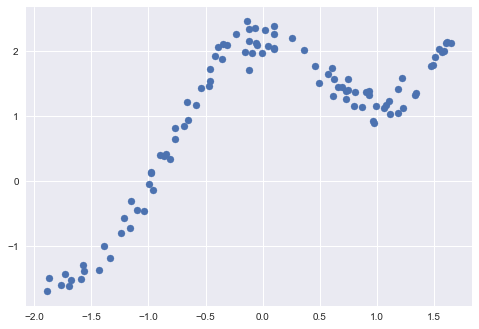

In [137]:
plt.scatter(X,Y) 

In [157]:
# note: if there is multivaraite data we should have calculated w using w = exp(-(Euclidean distance of querypoint)**2 / 2*tau*tau)

In [139]:
def getW(X, queryX, tau = 1.0):
    '''
        returning a diagonal weight- matrix 
    '''
    m = np.eye(X.shape[0])
    # z**2 = dot product of (Z and Z.T) 
    z = X[:,1:] - queryX    
    num = np.dot(z, z.T)
    den = 2*(tau**2)
    w = np.exp(-1*(num/den))  
    for i in range(X.shape[0]):
        m[i,i] = w[i][i]
        
    return m

In [140]:
def closed_form_solution(X,Y,queryX, tau = 1.0):
    # Adding ones column    
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones,X))
   
    w = getW(X, queryX, tau)
    first_part = np.linalg.pinv(X.T @ w @ X)
    second_part = X.T @ w @ Y
    return (first_part @ second_part).flatten()    
# @ is used for matrix multiplication    

In [141]:
def predict(X_test,theta):
    return theta[0] + X_test*theta[1]    

# Query

In [142]:
queryX = 0.0 # (given input after doing normalization over data)
theta = closed_form_solution(X,Y,queryX,tau = 0.5)

# Visualize 

In [143]:
intercept = theta[0]
slope = theta[1]

slope,intercept

(0.299180208249591, 1.7508396067222451)

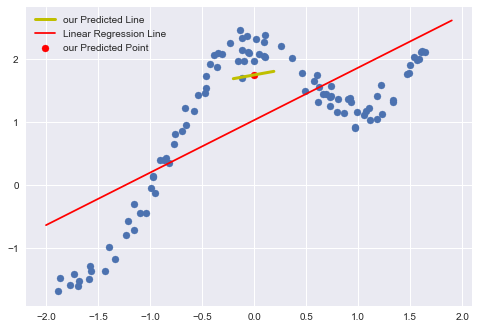

In [144]:
plt.scatter(X,Y) 
x_range = np.arange(queryX-0.2, queryX+0.2,0.01)
plt.scatter(queryX,predict(queryX,theta), c ='r',label = 'our Predicted Point')
plt.plot(x_range, predict(x_range,theta) ,c = 'y',lw = 3,label = 'our Predicted Line')
plt.legend(loc=2)

# if used Linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1,1),Y)
intercept = lr.intercept_.flatten()
slope = lr.coef_.flatten()
ranger = np.arange(-2,2,0.1)
plt.plot(ranger, intercept+slope*ranger ,c = 'r',label = 'Linear Regression Line ')
plt.legend(loc=2)
plt.show()


# doing pretty well , infact better, comparing to Linear Regression

# Another Dataset Example

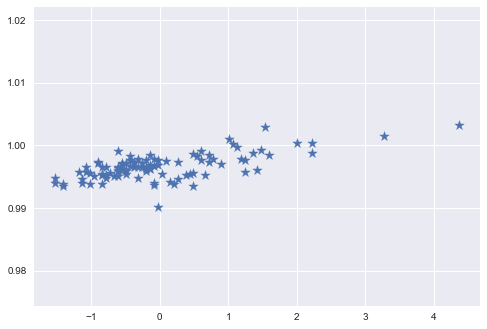

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('Datasets/linearX.csv').values
Y = pd.read_csv('Datasets/linearY.csv').values
# normalization/standarization of Data 
X  = (X-np.mean(X))/np.std(X)

plt.scatter(X,Y,marker='*',s=100)



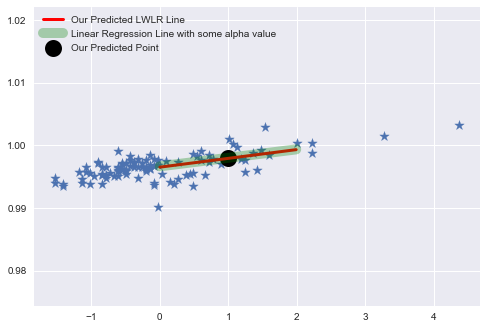

In [146]:
queryX = 1.0 # (given input after doing normalization over data)
theta = closed_form_solution(X,Y,queryX)

# Visualize this Locally weighted Regression Line
plt.scatter(X,Y,marker='*',s=100) 
x_range = np.arange(queryX-1, queryX+1, 0.01)
plt.scatter(queryX,predict(queryX,theta), c ='k',marker ='o',linewidths=10, label = 'Our Predicted Point')
plt.plot(x_range, predict(x_range,theta) ,c = 'r',lw = 3,label = 'Our Predicted LWLR Line')

# if used Linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)
intercept = lr.intercept_.flatten()
slope = lr.coef_.flatten()

plt.plot(x_range,intercept+slope*x_range ,c = 'g',lw = 10,label = 'Linear Regression Line with some alpha value',alpha=0.3)
plt.legend(loc=2)
plt.show()

 # Effect of tau(Bandwidth Parameter)

```python
- if tau value is large , then wi = exp(-1 * smallnumber tend to 0 ) -> exp(-0) = 1 , which means all wi's become 1 ,hence for a particular query point, we are treating each and every sample point (irrespective of whether point is close or far), being of equally responsible for affecting its prediction. hence this turns into Linear Regression.

- on the other hand , if we consider tau to be very small wi = tend to zero which means no points matter to us.
- so in b/w , we are talking about the bandwidth of the points,  affecting in deciding what should be  the prediction for a querypoint. 
```

##### Lets visualize this 

In [147]:
import numpy as np
import matplotlib.pyplot as plt


In [148]:
X = np.loadtxt('Datasets/weightedX.txt')
Y = np.loadtxt('Datasets/weightedY.txt')
# Normalizing the data
X = (X - X.mean())/X.std()
plt.style.use('seaborn')

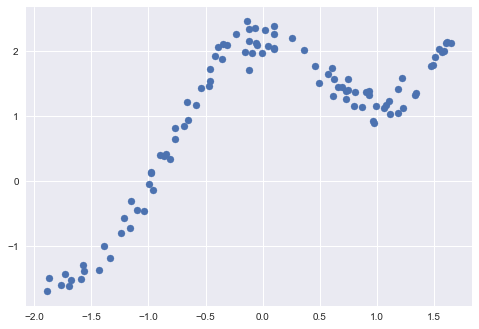

In [149]:
plt.scatter(X,Y) 

In [150]:
def plotPrediction(tau):
    
    x_test = np.linspace(-2,2,20)
    Y_test = []
    for query in x_test:
        theta = closed_form_solution(X,Y,query,tau)
        test = predict(query,theta)
        Y_test.append(test)
        
    Y_test = np.array(Y_test)
    plt.title('tau/Bandwidth Parameter :  %.2f'%tau)
    plt.scatter(X,Y, marker='^')
    plt.scatter(x_test,Y_test,marker='*',color='m',linewidths=3)


In [151]:
tau = [0.1, 0.5, 0.8, 1 ,10,20]

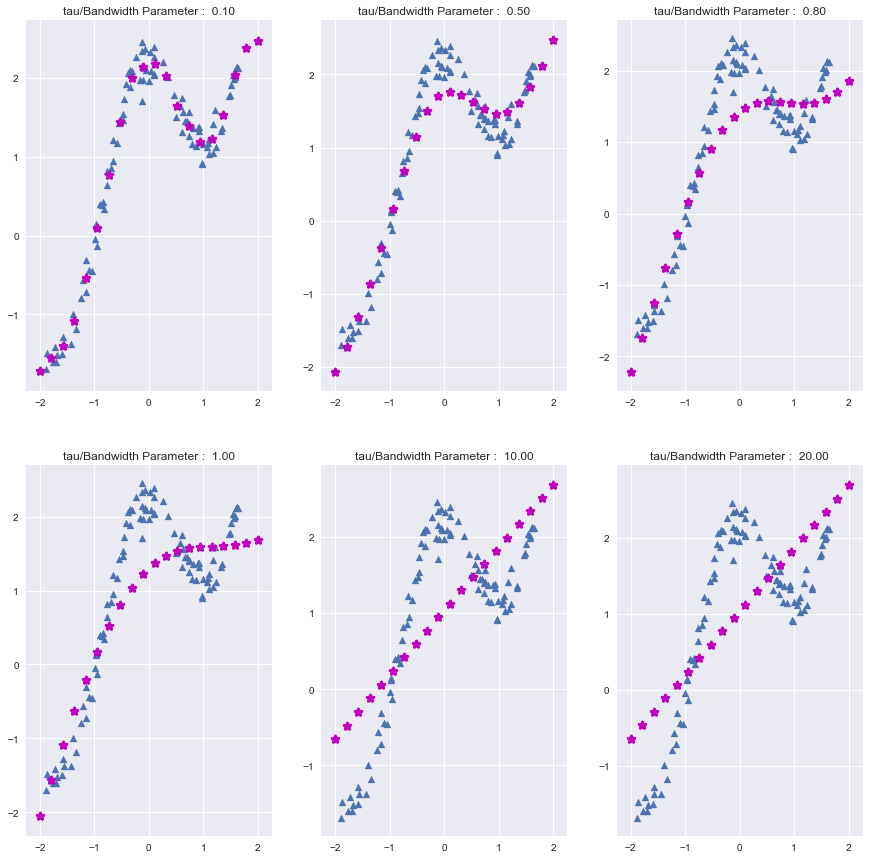

In [152]:
plt.figure(figsize=(15,15))
plt.subplot(231)
plotPrediction(tau[0])

plt.subplot(232)
plotPrediction(tau[1])

plt.subplot(233)
plotPrediction(tau[2])

plt.subplot(234)
plotPrediction(tau[3])

plt.subplot(235)
plotPrediction(tau[4])

plt.subplot(236)
plotPrediction(tau[5])


# Conclusion
- as tau increases ,our predictions moves more toward the prediction of Linear Regression